# CNN Sequence Model Dataset

This notebook shows how to use the `CNNSeqDataset` class to generate training datasets for the CNN Sequence image models. It requires that the image data has been download to the local machine first; see the notebook __Download Training Data from S3__ for instructions on how to do that.

In [1]:
# Required imports:

import os
import sys

import matplotlib.pyplot as plt

sys.path.append(os.path.join("..", "code"))
from cnn_model import *


DIR = os.getcwd()
DATA_DIR = os.path.join(os.path.dirname(DIR), "data")
TRAIN_DIR = os.path.join(DATA_DIR, "training_data")
DEV_DIR = os.path.join(DATA_DIR, "img_dir")

### Check the docstring

In [2]:
CNNSeqDataset?

Init signature:
CNNSeqDataset(
    precip_dirs: list,
    temp_dirs: list,
    et_dirs: list,
    swe_dirs: list,
    y_fp: str,
    y_col: str = 'm3',
    n_d_precip: int = 7,
    n_d_temp: int = 7,
    n_d_et: int = 8,
    swe_d_rel: list = range(7, 85, 7),
    n_d_y: int = 14,
    min_date: str = '2010_01_01',
    max_date: str = '2016_12_31',
    val_start: str = '2015_01_01',
    test_start: str = '2016_01_01',
    use_masks: bool = True,
    gages: list = None,
    random_seed: int = 42,
    shuffle_train: bool = True,
)
Docstring:      <no docstring>
Init docstring:
Construct image training dataset for training CNN sequence models.

Args:
    precip_dirs: directory(/ies) where precipitation images are saved.
    temp_dirs: directory(/ies) where temperature images are saved.
    et_dirs: directory(/ies) where ET images are saved.
    swe_dirs: directory(/ies) where SWE images are saved.
    y_fp: full filepath to CSV of streamgage measurement outcome data.
    y_col: column in `y

### Create an instance

In [3]:
DIR = os.getcwd()
DATA_DIR = os.path.join(os.path.dirname(DIR), "data")
TRAIN_DIR = os.path.join(DATA_DIR, "training_data")
Y_FP = os.path.join(DATA_DIR, "streamgage-full.csv")

cnn_data = CNNSeqDataset(
    
    precip_dirs = [TRAIN_DIR],
    temp_dirs = [TRAIN_DIR],
    et_dirs = [TRAIN_DIR],
    swe_dirs = [TRAIN_DIR],
    
    y_fp = Y_FP,
    y_col = 'm3',

    n_d_precip = 7,
    n_d_temp = 7,
    n_d_et = 8,
    swe_d_rel = range(7, 85, 7),
    n_d_y = 14,
    
    min_date = '2010_01_01',
    max_date = '2010_06_30',
    val_start = '2015_01_01',
    test_start = '2016_01_01',
    
    use_masks = True,
    
    gages = None,
    
    random_seed = 42,
    shuffle_train = True,
)

Calculating pixel mean/std from 7 images


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.04it/s]


### Create the filepath generator

In [4]:
fp_gen = cnn_data.train_filepath_generator()
next(fp_gen)

{'y': 2010-05-01    0.311485
 2010-05-02    0.311485
 2010-05-03    0.311485
 2010-05-04    0.283168
 2010-05-05    0.283168
 2010-05-06    0.283168
 2010-05-07    0.283168
 2010-05-08    0.311485
 2010-05-09    0.311485
 2010-05-10    0.311485
 2010-05-11    0.311485
 2010-05-12    0.311485
 2010-05-13    0.311485
 2010-05-14    0.311485
 Name: m3, dtype: float64,
 'temp': ['/Users/tp/projects/discharge-estimation/data/training_data/11208000__EPSG_4326__11131_95__ECMWF_ERA5_LAND_HOURLY__temperature_2m__2010_04_24.tif',
  '/Users/tp/projects/discharge-estimation/data/training_data/11208000__EPSG_4326__11131_95__ECMWF_ERA5_LAND_HOURLY__temperature_2m__2010_04_25.tif',
  '/Users/tp/projects/discharge-estimation/data/training_data/11208000__EPSG_4326__11131_95__ECMWF_ERA5_LAND_HOURLY__temperature_2m__2010_04_26.tif',
  '/Users/tp/projects/discharge-estimation/data/training_data/11208000__EPSG_4326__11131_95__ECMWF_ERA5_LAND_HOURLY__temperature_2m__2010_04_27.tif',
  '/Users/tp/projects/di

In [5]:
# Example usage:
filepaths = next(fp_gen)
filepaths

{'y': 2010-05-11    17.046742
 2010-05-12    16.027335
 2010-05-13    15.177830
 2010-05-14    14.639810
 2010-05-15    13.846938
 2010-05-16    13.705354
 2010-05-17    13.846938
 2010-05-18    14.130106
 2010-05-19    13.592086
 2010-05-20    13.478819
 2010-05-21    13.960205
 2010-05-22    13.648720
 2010-05-23    12.997433
 2010-05-24    12.600997
 Name: m3, dtype: float64,
 'temp': ['/Users/tp/projects/discharge-estimation/data/training_data/11189500__EPSG_4326__11131_95__ECMWF_ERA5_LAND_HOURLY__temperature_2m__2010_05_04.tif',
  '/Users/tp/projects/discharge-estimation/data/training_data/11189500__EPSG_4326__11131_95__ECMWF_ERA5_LAND_HOURLY__temperature_2m__2010_05_05.tif',
  '/Users/tp/projects/discharge-estimation/data/training_data/11189500__EPSG_4326__11131_95__ECMWF_ERA5_LAND_HOURLY__temperature_2m__2010_05_06.tif',
  '/Users/tp/projects/discharge-estimation/data/training_data/11189500__EPSG_4326__11131_95__ECMWF_ERA5_LAND_HOURLY__temperature_2m__2010_05_07.tif',
  '/Users/

### Create the data generator

In [6]:
data_gen = cnn_data.train_data_generator()

In [7]:
# Example usage:
sample = next(data_gen)
sample

{'y': array([0.31148531, 0.31148531, 0.31148531, 0.28316847, 0.28316847,
        0.28316847, 0.28316847, 0.31148531, 0.31148531, 0.31148531,
        0.31148531, 0.31148531, 0.31148531, 0.31148531]),
 'temp': array([[[-0.18976311, -0.54710108, -0.72279227],
         [ 0.19149444, -0.20193934, -0.58562946]],
 
        [[ 0.12360086, -0.32778487, -0.49774861],
         [ 0.46595424,  0.03366327, -0.3661958 ]],
 
        [[ 0.19703731, -0.25204   , -0.40583479],
         [ 0.59630251,  0.15492216, -0.24868473]],
 
        [[ 0.17512751, -0.21317944, -0.24285667],
         [ 0.62884849,  0.20952222, -0.13249229]],
 
        [[-0.31153536, -0.64766139, -0.79100794],
         [ 0.09542343, -0.28976646, -0.64129984]],
 
        [[-0.9592706 , -1.30330491, -1.45397604],
         [-0.52989531, -0.92391962, -1.29089379]],
 
        [[-0.8390317 , -1.19976854, -1.38634741],
         [-0.41126695, -0.8300463 , -1.22502685]]]),
 'precip': array([[[-3.13612229e-03, -1.87487105e-01, -8.89486341e-02],


## Inspect some training examples

#### SWE

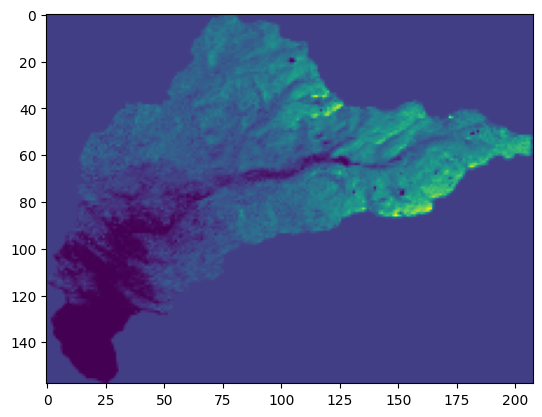

In [8]:
fig, ax = plt.subplots()
ax.imshow(sample["swe"][10])

#### Temp

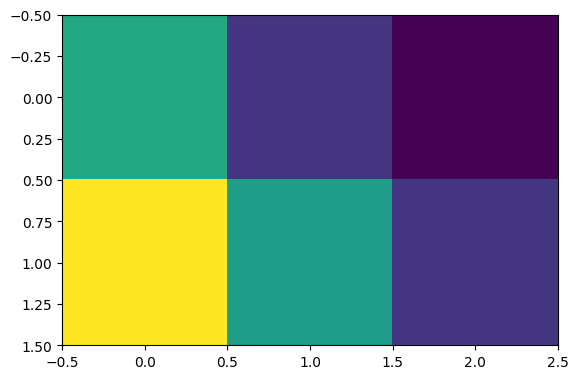

In [9]:
fig, ax = plt.subplots()
ax.imshow(sample["temp"][2])

#### Precip

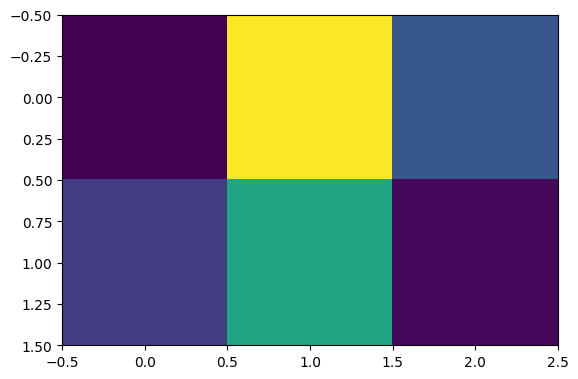

In [10]:
fig, ax = plt.subplots()
ax.imshow(sample["precip"][4])

#### ET

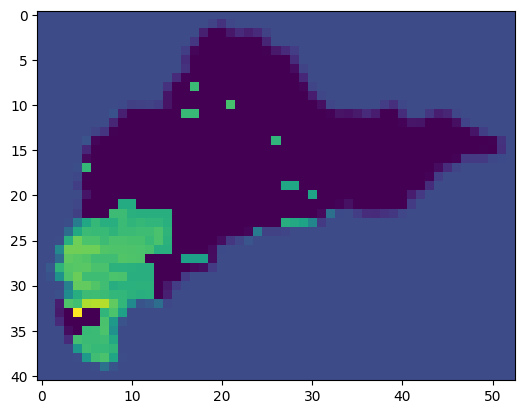

In [11]:
fig, ax = plt.subplots()
ax.imshow(sample["et"][0])

#### DEM

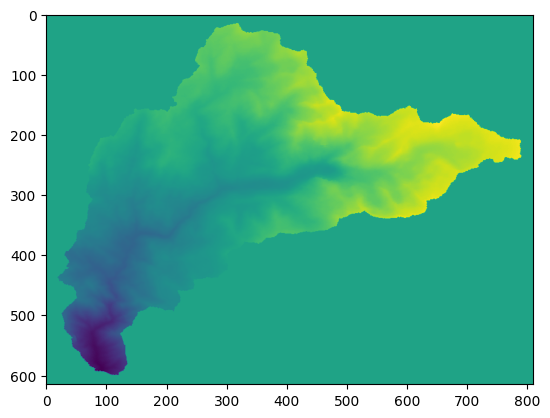

In [12]:
fig, ax = plt.subplots()
ax.imshow(sample["dem"][0])